# Solve CartPole using DQN

https://gym.openai.com/envs/CartPole-v0/

Some useful resources:
  * https://jaromiru.com/2016/09/27/lets-make-a-dqn-theory/

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from keras import models, layers, optimizers
from replay_buffer import ReplayBuffer
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Explore environment

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observation shape: (4,)
Number of actions: 2
Example state: [ 0.02405951  0.00078594 -0.00645056 -0.00912637]


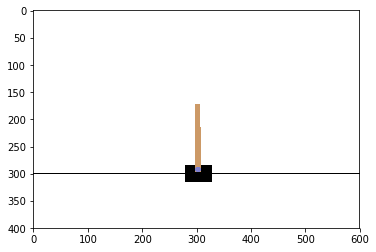

In [10]:
#spawn game instance for tests
env = gym.make("CartPole-v0") #create raw env

observation_shape = env.observation_space.shape
n_actions = env.action_space.n

print("Observation shape: {}".format(observation_shape))
print("Number of actions: {}".format(n_actions))

print("Example state: {}".format(env.reset()))
plt.imshow(env.render('rgb_array'))

# Build DQN Agent

## Define QNetwork

In [50]:
class QNetwork:
    
    def __init__(self, input_shape, n_actions, alpha=0.0003):
        self.input_shape = input_shape
        self.output_shape = n_actions
        self.alpha = alpha
        self.model = self._build_network()

    def _build_network(self):
        model = models.Sequential()
        model.add(layers.InputLayer(self.input_shape))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(self.output_shape, activation='linear'))
        opt = optimizers.RMSprop(lr=self.alpha)
        model.compile(loss='mse', optimizer=opt)
        return model
    
    def predict(self, state):
        """Make prediction for single state and return q values for all actions"""
        s = np.expand_dims(state, axis=0)
        return self.model.predict(s)[0]
    
    def predict_batch(self, states):
        """Make prediction for list of states"""
        return self.model.predict(states)
    
    def train(self, x, y):
        self.model.fit(x, y, batch_size=64)

        
network = QNetwork(observation_shape, n_actions)
network.predict(env.reset())

array([ 0.00070554, -0.00963012], dtype=float32)

## Define Agent

In [31]:
class DQNAgent:
    
    def __init__(self, state_shape, n_actions):
        self.state_shape = state_shape
        self.n_actions = n_actions
        self.model = build_network(state_shape, n_actions)
        
    def policy(self, state):
        return np.random.choice(range(self.n_actions))
    
    
agent = DQNAgent(observation_shape, n_actions)
agent.policy(env.reset())

1